In [16]:
import pandas as pd

stock = pd.read_csv('dataset/stock.csv', index_col='Date', parse_dates=True)

for id in set(stock.Id):
    display(pd.DataFrame(stock[stock.Id == id]))


,Id,Name,Open,High,Low,Close,Volume
Date,,,,,,,
2023-10-27,2382,廣達,206.0,206.5,201.5,203.0,36587.0
2023-10-26,2382,廣達,202.0,206.0,201.0,202.5,43216.0
2023-10-25,2382,廣達,210.0,214.0,207.0,210.5,42224.0
2023-10-24,2382,廣達,204.0,209.0,200.5,209.0,54659.0
2023-10-23,2382,廣達,201.5,207.5,200.0,200.5,43526.0
...,...,...,...,...,...,...,...
2019-01-08,2382,廣達,52.6,53.0,52.5,52.8,7578.0
2019-01-07,2382,廣達,52.8,53.0,52.0,52.5,10231.0
2019-01-04,2382,廣達,51.8,52.5,51.2,52.0,6337.0


,Id,Name,Open,High,Low,Close,Volume
Date,,,,,,,
2023-10-27,2330,台積電,534.0,536.0,532.0,533.0,17050.0
2023-10-26,2330,台積電,530.0,535.0,530.0,531.0,31682.0
2023-10-25,2330,台積電,544.0,551.0,544.0,544.0,17137.0
2023-10-24,2330,台積電,543.0,546.0,540.0,544.0,15761.0
2023-10-23,2330,台積電,552.0,553.0,543.0,544.0,24172.0
...,...,...,...,...,...,...,...
2019-01-08,2330,台積電,212.0,212.5,210.0,211.0,23794.0
2019-01-07,2330,台積電,212.0,214.0,211.0,213.0,35695.0
2019-01-04,2330,台積電,211.5,211.5,206.5,208.0,67043.0


,Id,Name,Open,High,Low,Close,Volume
Date,,,,,,,
2023-10-27,2317,鴻海,98.5,98.9,98.2,98.2,33549.0
2023-10-26,2317,鴻海,98.3,98.7,98.0,98.5,42562.0
2023-10-25,2317,鴻海,98.3,99.5,98.3,99.0,41361.0
2023-10-24,2317,鴻海,99.8,99.8,97.3,98.3,113705.0
2023-10-23,2317,鴻海,102.0,102.0,100.0,100.5,84175.0
...,...,...,...,...,...,...,...
2019-01-08,2317,鴻海,69.6,69.6,68.2,68.6,18303.0
2019-01-07,2317,鴻海,68.7,69.4,68.3,69.3,24084.0
2019-01-04,2317,鴻海,68.2,68.2,67.0,67.6,37313.0


,Id,Name,Open,High,Low,Close,Volume
Date,,,,,,,
2023-10-27,2454,聯發科,824.0,824.0,800.0,801.0,7422.0
2023-10-26,2454,聯發科,815.0,817.0,811.0,817.0,5768.0
2023-10-25,2454,聯發科,818.0,832.0,816.0,822.0,6590.0
2023-10-24,2454,聯發科,821.0,823.0,804.0,816.0,5162.0
2023-10-23,2454,聯發科,825.0,829.0,816.0,821.0,5392.0
...,...,...,...,...,...,...,...
2019-01-08,2454,聯發科,221.0,222.5,218.5,222.0,4626.0
2019-01-07,2454,聯發科,221.0,221.5,217.5,219.0,7008.0
2019-01-04,2454,聯發科,218.5,218.5,213.5,217.0,6492.0


In [17]:
from numpy import ndarray

"""單期簡單收益率"""

def single_period_return(stock_id: int) -> ndarray:
    # 只留下 Close.
    close = stock[stock.Id == stock_id]['Close']
    lag_close = close.shift(1)
    
    # 計算單期簡單收益率
    simple_return = (close - lag_close) / lag_close * 100
    simple_return.name = 'simpleret'
    return simple_return
    
def get_average_returns(series: ndarray) -> int:
    return series.sum() / len(series)
    

Average returns:  -0.08086443560290792


<Axes: ylabel='Frequency'>

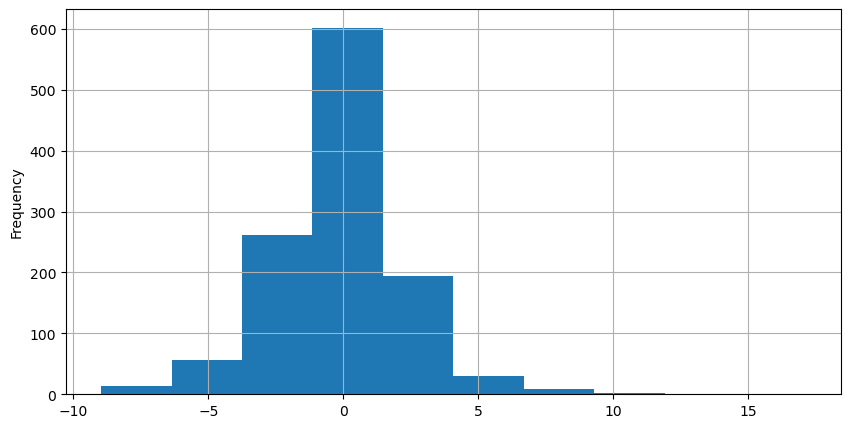

In [26]:
analyzed = single_period_return(2454)
print("Average returns: ", get_average_returns(analyzed))
analyzed.plot(kind='hist', grid=True, figsize=(10, 5))